# Classification model using the Iris data set

## Libraries and settings

In [1]:
# Libraries
import os
import joblib
import random
import pandas as pd

import urllib.request
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

u:\Lektionen\Scientific_Programming_FS2024\scientific_programming\Week_12\exercises\flask_classification_model_example


## Import data

In [2]:
# Import data
df = pd.read_csv("iris.csv")
print('Data set:')
print(df.head())

# Number of records per species
print('\nNumber of records per species:')
print(df['variety'].value_counts())

Data set:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Number of records per species:
variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


## Create X-matrix and y-variable

In [3]:
# Feature matrix
X = df.iloc[:, :-1].values
# print(X.shape)
print('Feature matrix')
print(X[:3])

# Target veriable
y = df.iloc[:, -1]
# print(y.shape)
print('\nTarget variable')
print(y[:6])

# Label encoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
joblib.dump(encoder, "saved_models/label_encoder.pkl")

Feature matrix
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Target variable
0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
5    Setosa
Name: variety, dtype: object


['saved_models/label_encoder.pkl']

## Create train/test data

In [4]:
# Create train/test data (80% train data, 20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)
print(X_train)
print(y_train)

[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]
 [5.  3.2 1.

## Train the model

In [5]:
# knn model

# k-NN models work by taking a data point and looking at the 'k' closest 
# labeled data points. The data point is then assigned the label of the 
# majority of the 'k' closest points. Because it uses simple assignments, knn
# models do not really need to be 'trained' like CART or Neural Networks.

clf = KNeighborsClassifier(n_neighbors=7, 
                                  metric='minkowski', 
                                  p=2)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

## Test the model

In [6]:
# Test the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.67%


## Test the model using cross-validation

In [7]:
# Test the model using cross-validation
scores_cv = cross_val_score(clf, X_test, y_test, cv=10)
print(f"Mean cross-validation score: {scores_cv.mean()*100:.2f}%")

Mean cross-validation score: 96.67%


## Save the model

In [8]:
# Save the model in pickle (.pkl) format
joblib.dump(clf, "saved_models/classification.pkl")

['saved_models/classification.pkl']

## Load the saved model and make predictions

X_new [[1, 2, 6, 2]]

Prediction (species): Versicolor


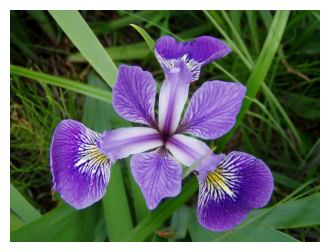

In [9]:
# Load the saved model
clf_loaded = joblib.load("saved_models/classification.pkl")
encoder_loaded = joblib.load("saved_models/label_encoder.pkl")

# New data (randomly generated values)
sepal_length = random.randint(1, 6)
sepal_width = random.randint(1, 6)
petal_length = random.randint(1, 6)
petal_width = random.randint(1, 6)
X_new = [[sepal_length, sepal_width, petal_length, petal_width]]
print("X_new", X_new)

# Prediction
# prediction_raw = clf_loaded.predict(X_new)
# print("Prediction (category):", int(prediction_raw))

prediction_real = encoder_loaded.inverse_transform(clf.predict(X_new))
print("\nPrediction (species):", prediction_real[0])

# Image
if prediction_real[0] == 'Virginica':
    # Load the image from URL
    url = "https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg"
    image = urllib.request.urlopen(url)

    img = plt.imread(image, format='jpg')
    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

elif prediction_real[0] == 'Versicolor':
    # Load the image from URL
    url = "https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg"
    image = urllib.request.urlopen(url)

    img = plt.imread(image, format='jpg')
    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

else:
    # Load the image from URL
    url = "https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg"
    image = urllib.request.urlopen(url)

    img = plt.imread(image, format='jpg')
    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [10]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-02-06 22:48:42
Python Version: 3.10.13
-----------------------------------
